In [1]:
from scripts.subscripts.MDS import TimeSeriesMDS
from numpy import loadtxt, float64

from matplotlib.pyplot import subplots, show
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

In [2]:
PTEX_dissim = loadtxt("./data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

In [3]:
# Name of MDS procedures and number of dimensions to check stress-1
list_procedures = ("classic", "dissim", "SMACOF-euclidean", "SMACOF-dissim", "SMACOF-euclidean-classic", "SMACOF-dissim-classic")
list_dimensions = list(range(1, 11))

# SMACOF hyperpameters
max_iters = 1000
eps = 1e-6

# Time Series Clustering through MDS class instance
TECSeries_MDS = TimeSeriesMDS(dissimilarity = PTEX_dissim)

### Exploración de métodos MDS

In [4]:
stress_by_procedure = dict()

for procedure in list_procedures:
    stress_by_procedure[procedure] = len(list_dimensions)*[0.0]
    for k, num_dim in enumerate(list_dimensions):
        TECSeries_MDS.fit(num_comps = num_dim, method = procedure, max_iter = max_iters, eps = eps, verbose = 1, visualize_shepard = False)
        stress_by_procedure[procedure][k] = TECSeries_MDS.normalized_stress

classic with 1 components has a stress-1 value of 0.335960
classic with 2 components has a stress-1 value of 0.219231
classic with 3 components has a stress-1 value of 0.149752
classic with 4 components has a stress-1 value of 0.120788
classic with 5 components has a stress-1 value of 0.096556
classic with 6 components has a stress-1 value of 0.086039
classic with 7 components has a stress-1 value of 0.072380
classic with 8 components has a stress-1 value of 0.071358
classic with 9 components has a stress-1 value of 0.071109
classic with 10 components has a stress-1 value of 0.069498
dissim with 1 components has a stress-1 value of 0.335960
dissim with 2 components has a stress-1 value of 0.219231
dissim with 3 components has a stress-1 value of 0.149752
dissim with 4 components has a stress-1 value of 0.120788
dissim with 5 components has a stress-1 value of 0.096556
dissim with 6 components has a stress-1 value of 0.086039
dissim with 7 components has a stress-1 value of 0.072380
dis

## Curvas Stress-1

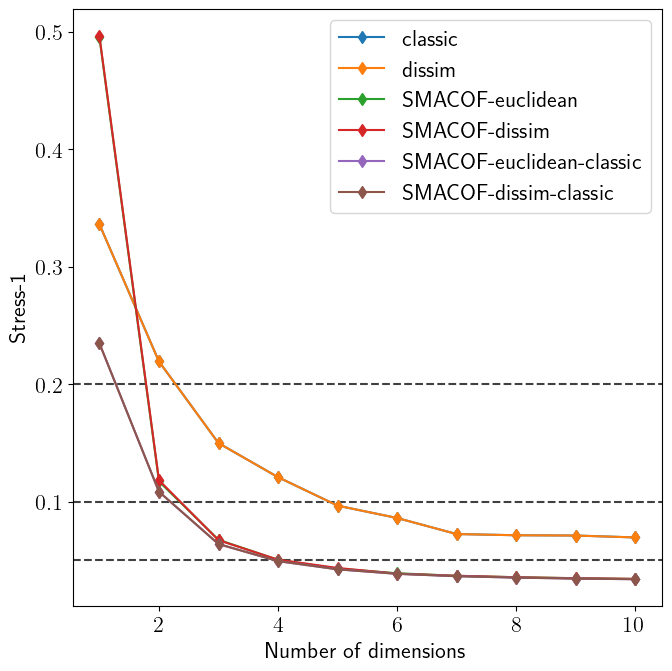

In [5]:
Figure, Subplot = subplots(1, 1, figsize = (7, 7))

for procedure in list_procedures:
    Subplot.plot(list_dimensions, stress_by_procedure[procedure], "-d", label =  procedure)
Subplot.axhline(y = 0.2, color = "black", linestyle = "--", alpha = 0.75, zorder = 0)
Subplot.axhline(y = 0.1, color = "black", linestyle = "--", alpha = 0.75, zorder = 0)
Subplot.axhline(y = 0.05, color = "black", linestyle = "--", alpha = 0.75, zorder = 0)
Subplot.set_xlabel("Number of dimensions")
Subplot.set_ylabel("Stress-1")
Subplot.legend()

Figure.tight_layout()

show()